성능지표 ( 모델 평가 기준 )

-[분류평가기준] : 
* accaracy : 몇 개를 제대로 맞췄는지
    - 불균형 데이터일 경우 
* f1 score : 정밀도와 재현율을 조화 평균
* precision : 양성 예측이 제대로 예측된 건지. <= 예측 모델의 관점
* recall : 양성인 것을 얼마나 양성이라고 예측했는지 <= 정답 관점

- 이진분류 : ROC/AUC (의료계 쪽 데이터에서 많이 씀)
- 다중분류 : micro, macro, weight


-[회귀평가기준] :     
* MSE, MAE, RMSE <=  오차, 잔차(殘差), 에러
* R2score <= 선형식이 회귓값을 얼마나 잘 설명하는지

### 모델 성능평가 지표 살펴보기 => 다중 분류
- scikit-learn의 metrics
- pytorch의 torchmetrics
- 평가 함수 직접 생성

- 모듈 로딩 및 데이터 준비 <hr>

In [4]:
# 모듈 로딩
import torch
import torchmetrics.functional.classification as metrics
import sklearn.metrics as skm
import numpy as np

In [5]:
# 임의의 데이터 준비 : 다중분류 0, 1, 2
target = torch.tensor([2,1,0,0]) # 값 = 3개 ==> 다중분류
preds = torch.tensor([2,1,0,1])

- 성능평가 [1] torchmetrics

In [9]:
# 혼돈행렬(Confusion Matrix)
con = metrics.confusion_matrix(preds, target, task='multiclass', num_classes=3)
print(f'[Confusion Matrix]\n{con}') # target : [2, 1, 0, 0] # preds : [2, 1, 0, 1]

[Confusion Matrix]
tensor([[1, 1, 0],
        [0, 1, 0],
        [0, 0, 1]])


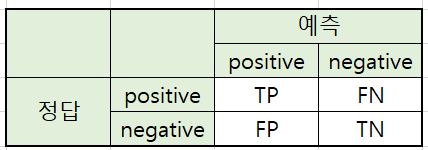

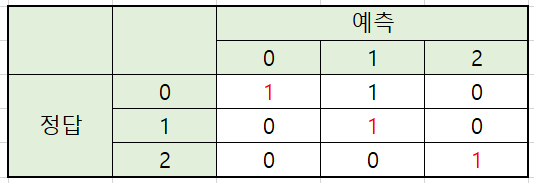


- 정밀도  = (1+1+1)/(1+1+1+1) = 0.75
- 재현율 = (1+1+1)/(1+1+1+1) = 0.75

macro
- 모든 클래스별 성능 측정하여 평균
- 균형 클래스 적용 
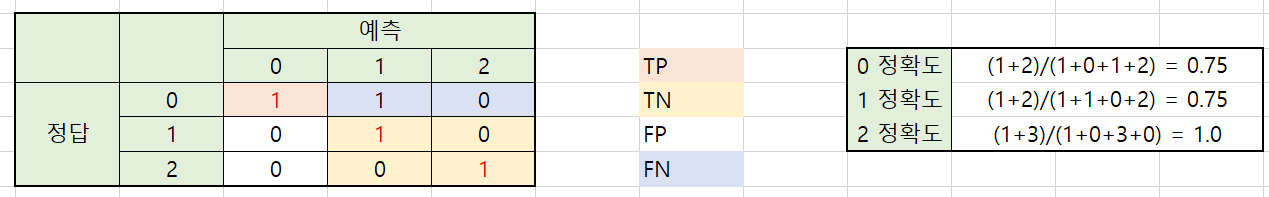


In [12]:
# micro 경우, 즉, 균형 데이터셋
precision = metrics.precision(preds, target, task='multiclass', num_classes=3, average='micro')
recall = metrics.recall(preds, target, task='multiclass', num_classes=3, average='micro')
f1 = metrics.f1_score(preds, target, task='multiclass', num_classes=3, average='micro')
accuracy = metrics.accuracy(preds, target, task='multiclass', num_classes=3, average='micro')
metrics.multiclass_accuracy(preds, target, num_classes=3, average='micro')
print(f'target = {target}')
print(f'Preds = {preds}')
print(f'[Precision] : {precision}\n[recall] : : {recall}\n[f1 score] : {f1}\n[accuracy] : {accuracy}\n')

target = tensor([2, 1, 0, 0])
Preds = tensor([2, 1, 0, 1])
[Precision] : 0.75
[recall] : : 0.75
[f1 score] : 0.75
[accuracy] : 0.75



In [14]:
# macro 경우, 즉, 균형 데이터셋
precision = metrics.precision(preds, target, task='multiclass', num_classes=3, average='macro')
recall = metrics.recall(preds, target, task='multiclass', num_classes=3, average='macro')
f1 = metrics.f1_score(preds, target, task='multiclass', num_classes=3, average='macro')
accuracy = metrics.accuracy(preds, target, task='multiclass', num_classes=3, average='macro')
metrics.multiclass_accuracy(preds, target, num_classes=3, average='macro')
print(f'target = {target}')
print(f'Preds = {preds}')
print(f'[Precision] : {precision}\n[recall] : : {recall}\n[f1 score] : {f1}\n[accuracy] : {accuracy}\n')

target = tensor([2, 1, 0, 0])
Preds = tensor([2, 1, 0, 1])
[Precision] : 0.8333333730697632
[recall] : : 0.8333333730697632
[f1 score] : 0.7777777910232544
[accuracy] : 0.8333333730697632



-성능 평가 [2] scikit-learn

In [21]:
# 혼돈 행렬(Confusion Matrix)
#skm.confusion_matrix(정답, 예측값)
# Tensor => Numpy

targetNP = np.array(target)
predsNP = preds.numpy() #tensor 안에 numpy 메서드

[[1 1 0]
 [0 1 0]
 [0 0 1]]


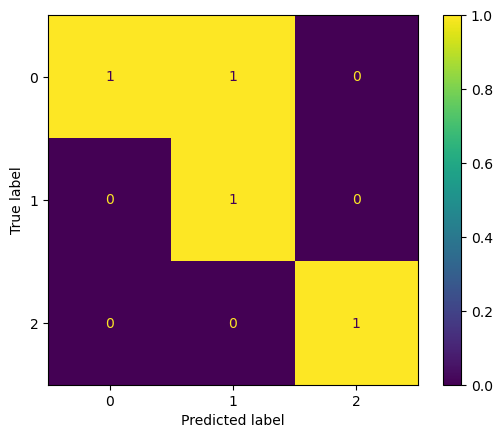

In [25]:
import matplotlib.pyplot as plt

# 정답 / 예측값 순으로 입력.
con = skm.confusion_matrix(targetNP, predsNP)
print(con)

conDisplay = skm.ConfusionMatrixDisplay(con) # 시각화 시키는 것.
conDisplay.plot()
plt.show()

In [31]:
# 다중분류 성능 분석 출력
p_score = skm.precision_score(targetNP, predsNP, average='micro')
rcl_score = skm.recall_score(targetNP, predsNP, average='micro')
f1_score = skm.f1_score(targetNP, predsNP, average='micro')
acc_score = skm.accuracy_score(targetNP, predsNP)
report = skm.classification_report(targetNP, predsNP)
print(f'[precision score] {p_score}\n[Recall score] {rcl_score}\n[F1 score] {f1_score}\n[accuracy score] {acc_score}')
print(report)


[precision score] 0.75
[Recall score] 0.75
[F1 score] 0.75
[accuracy score] 0.75
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4



In [32]:
p_score = skm.precision_score(targetNP, predsNP, average='macro')
rcl_score = skm.recall_score(targetNP, predsNP, average='macro')
f1_score = skm.f1_score(targetNP, predsNP, average='macro')
acc_score = skm.accuracy_score(targetNP, predsNP)
report = skm.classification_report(targetNP, predsNP)
print(f'[precision score] {p_score}\n[Recall score] {rcl_score}\n[F1 score] {f1_score}\n[accuracy score] {acc_score}')
print(report)

[precision score] 0.8333333333333334
[Recall score] 0.8333333333333334
[F1 score] 0.7777777777777777
[accuracy score] 0.75
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4

